#

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)


                        

In [13]:
df=pd.read_csv('emp_promotion.csv')
df.shape


(54808, 14)

In [14]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


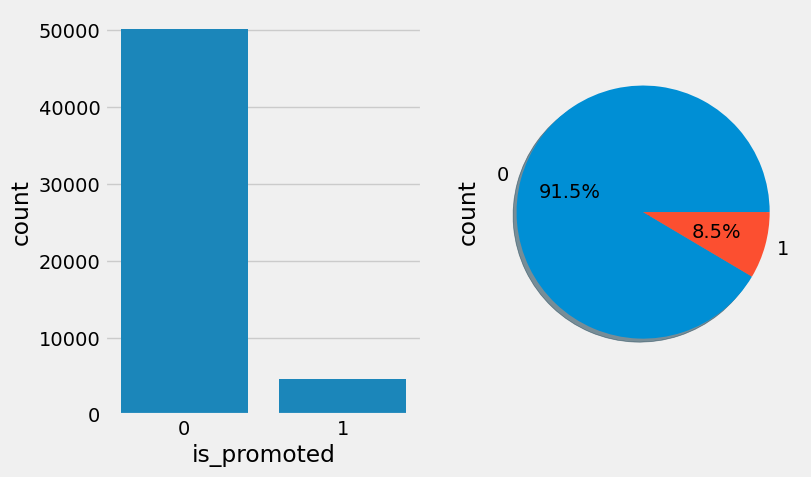

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))  # Adjust figure size (width, height)

# Subplot with bar chart
plt.subplot(1,2,1)  # Change to 1 row, 2 columns, subplot 1
sns.countplot(x="is_promoted", data=df)  # Use 'x' for clarity

# Subplot with pie chart
plt.subplot(1,2,2)  # Change to 1 row, 2 columns, subplot 2
df['is_promoted'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)  # Adjust percentage format

plt.show()

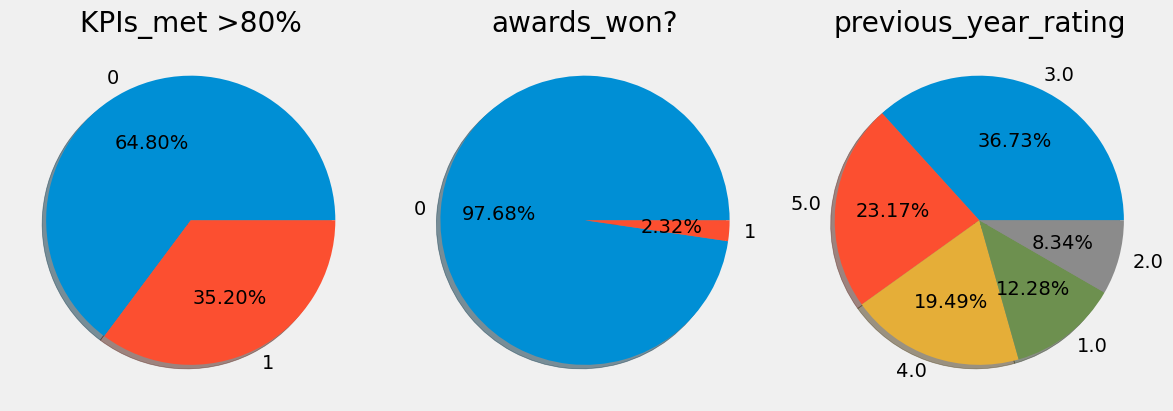

In [16]:
import pandas as pd
import matplotlib.pyplot as plt



# Create the subplots and pie charts
plt.figure(figsize=(12, 6))  # Adjust figure size as desired

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie', shadow=True, autopct='%.2f%%')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie', shadow=True, autopct='%.2f%%')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie', shadow=True, autopct='%.2f%%')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<Axes: ylabel='avg_training_score'>

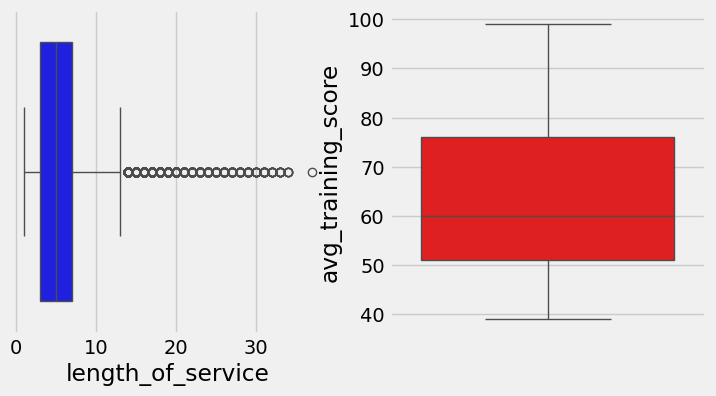

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Change the figure size
plt.figure(figsize=(8, 4))  # Adjust width and height as desired

plt.subplot(1,2,1)
sns.boxplot(
    x = df['length_of_service'],  # Change x variable if needed
      # Change y variable if needed
    color='blue'                     # Change color of the boxplot
)
plt.subplot(1,2,2)
sns.boxplot(y = df['avg_training_score'],color='red')


In [18]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [19]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [20]:
df=df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

In [21]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [22]:
df['education']=df['education'].fillna(df['education'].mode()[0])
print(df['education'].value_counts())

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


In [23]:
df['education']

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
5              Bachelor's
6              Bachelor's
7        Master's & above
8              Bachelor's
9        Master's & above
10             Bachelor's
11             Bachelor's
12             Bachelor's
13       Master's & above
14       Master's & above
15             Bachelor's
16             Bachelor's
17             Bachelor's
18             Bachelor's
19             Bachelor's
20             Bachelor's
21             Bachelor's
22             Bachelor's
23             Bachelor's
24       Master's & above
25             Bachelor's
26             Bachelor's
27             Bachelor's
28             Bachelor's
29             Bachelor's
30             Bachelor's
31             Bachelor's
32             Bachelor's
33             Bachelor's
34             Bachelor's
35             Bachelor's
36             Bachelor's
37             Bachelor's
38       Mas

In [24]:
print(df['previous_year_rating'].value_counts())
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


In [25]:
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]

negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [26]:
df.drop(index=[31860,51374],inplace=True)

In [27]:
import numpy as np

q1 = np.quantile(df['length_of_service'], 0.25)
q3 = np.quantile(df['length_of_service'], 0.75)

IQR = q3 - q1

# Outlier Detection using a threshold multiplier (can be adjusted)
outlier_multiplier = 1.5  # You can adjust this value based on your data

upper_bound = q3 + outlier_multiplier * IQR
lower_bound = outlier_multiplier * IQR-q1

print('q1:', q1)
print('q3:', q3)
print('IQR:', IQR)

print('Upper Bound:', upper_bound)
print('Lower Bound:', lower_bound)

# Identify outliers based on both upper and lower bounds
outliers = df[(df['length_of_service'] > upper_bound) | (df['length_of_service'] < lower_bound)]

print('Number of Outliers:', len(outliers))


q1: 3.0
q3: 7.0
IQR: 4.0
Upper Bound: 13.0
Lower Bound: 3.0
Number of Outliers: 14719


In [28]:
pd.crosstab([df['length_of_service']>upper_bound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [29]:
df['length_of_service']=[upper_bound if x>upper_bound else x for x in df['length_of_service']]

In [30]:
df['education']=df['education'].replace(("Below Secondary", "Bachelor's", "Master's & above"),(1,2,3))

lb=LabelEncoder()

df['department']=lb.fit_transform(df['department'])

In [31]:
x = df.drop('is_promoted', axis=1) 
y=df['is_promoted'] 
print(x.shape) 
print(y.shape)

(54806, 9)
(54806,)


In [32]:

pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE


sm =SMOTE()

x_resample, y_resample = sm.fit_resample(x,y)


Text(0.5, 1.0, 'After oversampling')

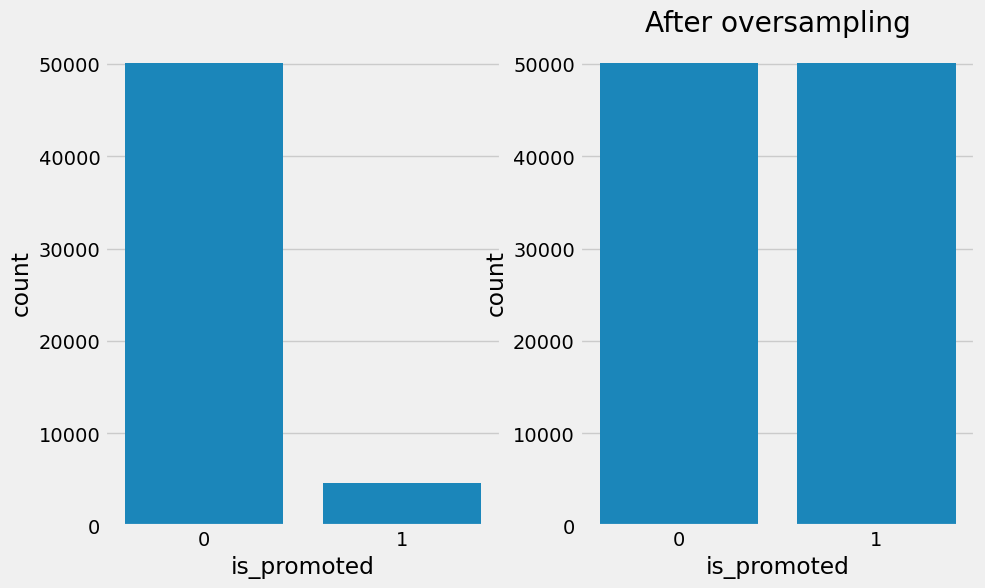

In [34]:
plt.figure(figsize=(10, 6))  # Adjust figure size (width, height)

# Subplot with bar chart
plt.subplot(1,2,1)  # Change to 1 row, 2 columns, subplot 1
sns.countplot(x="is_promoted", data=df)  # Use 'x' for clarity
plt.subplot(122)

sns.countplot(x=y_resample) 
plt.title('After oversampling')





In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=10)
print('Shape of x_train {}'.format(x_train.shape))

print('Shape of y_train {}'.format(y_train.shape)) 
print('Shape of x_test {}'.format(x_test.shape))

print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (80224, 9)
Shape of y_train (80224,)
Shape of x_test (20056, 9)
Shape of y_test (20056,)


In [40]:
def decisionTree(x_train,x_test,y_train,y_test):
 dt=DecisionTreeClassifier()
 dt.fit(x_train,y_train)
 y_pred=dt.predict(x_test)
 print("DecisionTreeClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred))
 print('Classification report') 
 print(classification_report(y_test,y_pred))
 return y_pred

In [41]:
y_pred = decisionTree(x_train, x_test, y_train, y_test)

DecisionTreeClassifier
Confusion matrix
[[9289  746]
 [ 510 9511]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10035
           1       0.93      0.95      0.94     10021

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



In [42]:
confusion_matrix(y_test,y_pred)

array([[9289,  746],
       [ 510, 9511]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred)

0.9373753490227363

In [44]:
f1_score(y_test,y_pred)

0.9380609527566821

In [45]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94     10035\n           1       0.93      0.95      0.94     10021\n\n    accuracy                           0.94     20056\n   macro avg       0.94      0.94      0.94     20056\nweighted avg       0.94      0.94      0.94     20056\n'

In [122]:
def randomForest(x_train,x_test,y_train,y_test):
 rf=RandomForestClassifier()
 rf.fit(x_train,y_train)
 y_pred=rf.predict(x_test)
 print("RandomForestClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred))
 print('Classification report') 
 print(classification_report(y_test,y_pred))
 return y_pred
 

In [126]:
y_pred = randomForest(x_train, x_test, y_train, y_test)


RandomForestClassifier
Confusion matrix
[[9498  537]
 [ 477 9544]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10035
           1       0.95      0.95      0.95     10021

    accuracy                           0.95     20056
   macro avg       0.95      0.95      0.95     20056
weighted avg       0.95      0.95      0.95     20056



In [131]:
confusion_matrix(y_test,y_pred)

array([[9498,  537],
       [ 477, 9544]], dtype=int64)

In [132]:
accuracy_score(y_test,y_pred)

0.9494415636218588

In [133]:
f1_score(y_test,y_pred)

0.9495572579842801

In [134]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95     10035\n           1       0.95      0.95      0.95     10021\n\n    accuracy                           0.95     20056\n   macro avg       0.95      0.95      0.95     20056\nweighted avg       0.95      0.95      0.95     20056\n'

In [135]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train,x_test,y_train,y_test):
 knn=KNeighborsClassifier()
 knn.fit(x_train,y_train)
 y_pred=knn.predict(x_test)
 print("KNeighboursClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred))
 print('Classification report') 
 print(classification_report(y_test,y_pred))
 return y_pred

In [108]:
y_pred=KNN(x_train,x_test,y_train,y_test)

KNeighboursClassifier
Confusion matrix
[[8242 1793]
 [ 308 9713]]
Classification report
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     10035
           1       0.84      0.97      0.90     10021

    accuracy                           0.90     20056
   macro avg       0.90      0.90      0.89     20056
weighted avg       0.90      0.90      0.89     20056

accuracy_score
0.8952433187076186
f1_score
0.9024016351558508


In [109]:
confusion_matrix(y_test,y_pred)

array([[8242, 1793],
       [ 308, 9713]], dtype=int64)

In [110]:
accuracy_score(y_test,y_pred)

0.8952433187076186

In [111]:
f1_score(y_test,y_pred)

0.9024016351558508

In [112]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.82      0.89     10035\n           1       0.84      0.97      0.90     10021\n\n    accuracy                           0.90     20056\n   macro avg       0.90      0.90      0.89     20056\nweighted avg       0.90      0.90      0.89     20056\n'

In [211]:
def xgboost(x_train,x_test,y_train,y_test):
 xg=GradientBoostingClassifier()
 xg.fit(x_train,y_train)
 y_pred=xg.predict(x_test)
 print("GradientBoostingClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred))
 print('Classification report') 
 print(classification_report(y_test,y_pred))
 return y_pred

In [212]:
y_pred=xgboost(x_train,x_test,y_train,y_test)

GradientBoostingClassifier
Confusion matrix
[[8409 1626]
 [1094 8927]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10035
           1       0.85      0.89      0.87     10021

    accuracy                           0.86     20056
   macro avg       0.87      0.86      0.86     20056
weighted avg       0.87      0.86      0.86     20056



In [213]:
confusion_matrix(y_test,y_pred)

array([[8409, 1626],
       [1094, 8927]], dtype=int64)

In [214]:
accuracy_score(y_test,y_pred)

0.864379736737136

In [215]:
f1_score(y_test,y_pred)

0.8677943034898415

In [216]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86     10035\n           1       0.85      0.89      0.87     10021\n\n    accuracy                           0.86     20056\n   macro avg       0.87      0.86      0.86     20056\nweighted avg       0.87      0.86      0.86     20056\n'

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
def decisionTree(x_train,x_test,y_train,y_test):
 dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10,
                             min_samples_leaf=5,random_state=42)
 dt.fit(x_train,y_train)
 y_pred_dt=dt.predict(x_test)
 print("DecisionTreeClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred_dt))
 print('Classification report') 
 print(classification_report(y_test,y_pred_dt))
 return y_pred_dt


In [218]:
y_pred_dt=decisionTree(x_train,x_test,y_train,y_test)

DecisionTreeClassifier
Confusion matrix
[[7306 2729]
 [2168 7853]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     10035
           1       0.74      0.78      0.76     10021

    accuracy                           0.76     20056
   macro avg       0.76      0.76      0.76     20056
weighted avg       0.76      0.76      0.76     20056



In [219]:
accuracy_score(y_test,y_pred_dt)

0.7558336657359394

In [101]:
def compareModel(x_train,x_test,y_train,y_test):
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    randomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('-'*100)
    xgboost(x_train,x_test,y_train,y_test)
  

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier() 
rf.fit(x_train,y_train) 
yPred=rf.predict(x_test)

cv= cross_val_score(rf,x_resample,y_resample,cv=5)

np.mean(cv)

0.9462903869166335

In [194]:

pickle.dump(rf, open('promotion_model.pkl', 'wb'))

In [208]:
from sklearn.ensemble import RandomForestClassifier

def randomForest(x_train,x_test,y_train,y_test):
 rf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
 rf.fit(x_train,y_train)
 y_pred_rf=rf.predict(x_test)
 print("RandomForestClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred_rf))
 print('Classification report') 
 print(classification_report(y_test,y_pred_rf))
 return y_pred_rf


In [209]:
y_pred_rf=randomForest(x_train,x_test,y_train,y_test)

RandomForestClassifier
Confusion matrix
[[7317 2718]
 [1378 8643]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.73      0.78     10035
           1       0.76      0.86      0.81     10021

    accuracy                           0.80     20056
   macro avg       0.80      0.80      0.79     20056
weighted avg       0.80      0.80      0.79     20056



In [210]:
accuracy_score(y_test,y_pred_rf)

0.7957718388512166

In [200]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train,x_test,y_train,y_test):
  knn=KNeighborsClassifier(n_neighbors=3, weights='uniform',algorithm='auto',leaf_size=10)
  knn.fit(x_train,y_train)
  y_pred_kn=knn.predict(x_test)
  print('Confusion matrix') 
  print(confusion_matrix(y_test,y_pred_kn))
  print('Classification report') 
  print(classification_report(y_test,y_pred_kn))
  return y_pred_kn

In [201]:
y_pred_kn=KNN(x_train,x_test,y_train,y_test)

Confusion matrix
[[8451 1584]
 [ 356 9665]]
Classification report
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     10035
           1       0.86      0.96      0.91     10021

    accuracy                           0.90     20056
   macro avg       0.91      0.90      0.90     20056
weighted avg       0.91      0.90      0.90     20056



In [202]:
accuracy_score(y_test,y_pred_kn)

0.9032708416433984

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
def xgboost(x_train,x_test,y_train,y_test):
 xg=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
 xg.fit(x_train,y_train)
 y_pred_xg=xg.predict(x_test)
 print('Confusion matrix') 
 print(confusion_matrix(y_test,y_pred_xg))
 print('Classification report') 
 print(classification_report(y_test,y_pred_xg))
 return y_pred_xg

In [182]:
y_pred_xg=xgboost(x_train,x_test,y_train,y_test)

Confusion matrix
[[8409 1626]
 [1094 8927]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10035
           1       0.85      0.89      0.87     10021

    accuracy                           0.86     20056
   macro avg       0.87      0.86      0.86     20056
weighted avg       0.87      0.86      0.86     20056



In [183]:
accuracy_score(y_test,y_pred_xg)

0.864379736737136